In [34]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from get_homography import *
from stitch3 import *
from stitch_neo import *
import sys
from getHomographedImg import *
sys.path.append('gradient_blending')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# img1=cv2.imread('images/mountain-left.jpg')
# img2=cv2.imread('images/mountain-middle.jpg')
# img3=cv2.imread('images/mountain-right.jpg')
# img1=cv2.imread('images/firewatch-left.jpg')
# img2=cv2.imread('images/firewatch-middle.jpg')
# img3=cv2.imread('images/firewatch-right.jpg')
# img1=cv2.imread('images/small-left.jpg')
# img2=cv2.imread('images/small-middle.jpg')
# img3=cv2.imread('images/small-right.jpg')
img1=cv2.imread('images/web-left.jpg')
img2=cv2.imread('images/web-middle.jpg')
img3=cv2.imread('images/web-right.jpg')

HLM = get_homography(img1,img2)
HMR = get_homography(img2,img3)

5459
5468
Rmax1.4142135623730951
(470,)
(456,)
MaxInlierCount456
Final H[[ 1.12966570e+00 -5.46321812e-02 -1.65052137e+02]
 [ 1.09376598e-01  1.08177909e+00 -3.72189356e+00]
 [ 3.56433597e-04 -4.48372703e-05  1.00000000e+00]]
5468
5799
Rmax1.4142135623730951
(1228,)
(1223,)
MaxInlierCount1223
Final H[[ 1.11979687e+00 -1.27456561e-02 -1.52702570e+02]
 [ 6.12398532e-02  1.07008163e+00  8.29669147e+00]
 [ 3.28117237e-04 -5.25469122e-05  1.00000000e+00]]


[[1, 0, 183.27860622182368], [0, 1, 3.7218935631888455], [0, 0, 1]]
[[ 1.12966570e+00 -5.46321812e-02 -1.65052137e+02]
 [ 1.09376598e-01  1.08177909e+00 -3.72189356e+00]
 [ 3.56433597e-04 -4.48372703e-05  1.00000000e+00]]
[[ 1.19499236e+00 -6.28498936e-02  1.82264692e+01]
 [ 1.10703206e-01  1.08161221e+00  0.00000000e+00]
 [ 3.56433597e-04 -4.48372703e-05  1.00000000e+00]]
(278, 247)
(272, 259)


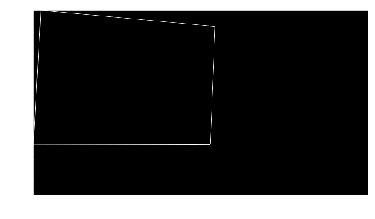

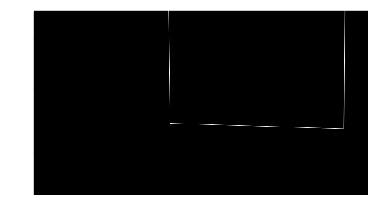

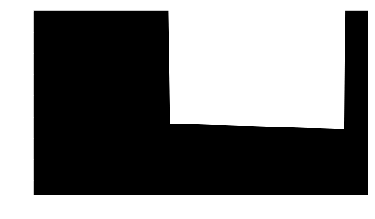

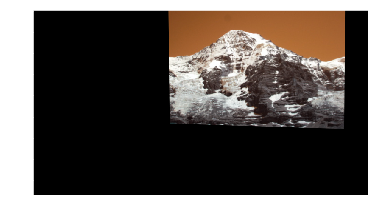

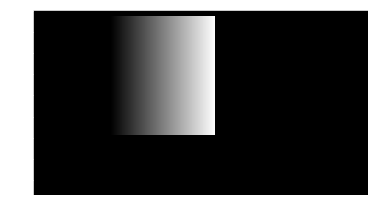

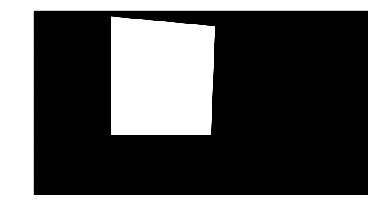

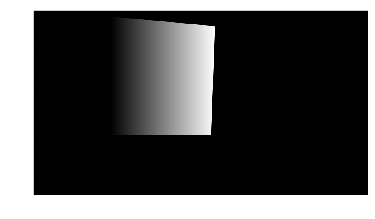

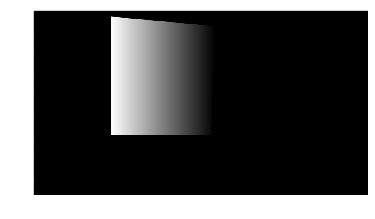

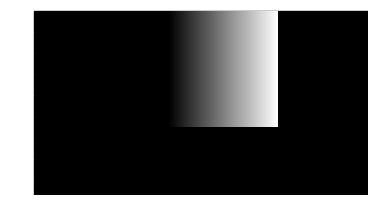

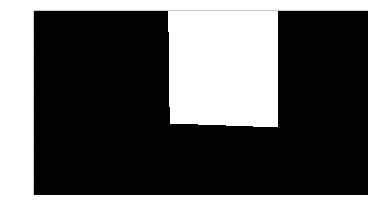

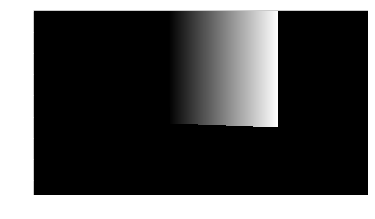

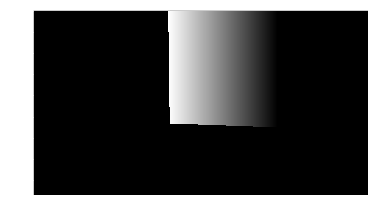

True

In [36]:
canvas,poisson = stitch3(img1,img2,img3,HLM,HMR)

cv2.imwrite("res.png",canvas)
cv2.imwrite("poison.png",poisson)

In [37]:
# Sclahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# canvas[:,:,0] = clahe.apply(canvas[:,:,0])
# canvas[:,:,1] = clahe.apply(canvas[:,:,1])
# canvas[:,:,2] = clahe.apply(canvas[:,:,2])
# # canvas[:,:,0] = cv2.equalizeHist(canvas[:,:,0])
# # canvas[:,:,1] = cv2.equalizeHist(canvas[:,:,1])
# # canvas[:,:,2] = cv2.equalizeHist(canvas[:,:,2])

In [38]:
f = np.array([[1,2,3],[4,5,6]])
a = np.linspace(0,1,f.shape[1])
np.multiply(f,a)
print(1-a)


[1.  0.5 0. ]


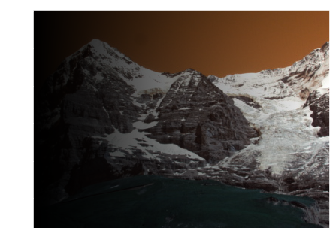

In [39]:
a = np.linspace(0,1,img1.shape[1])
f = np.ones((img1.shape[0],img1.shape[1]))
f=f*a
f3 = np.zeros((img1.shape[0],img1.shape[1],3))
f3[:,:,0]=f
f3[:,:,1]=f
f3[:,:,2]=f
r=f3*img1
plt.imshow(r.astype('int'))


[[ 1.12966570e+00 -5.46321812e-02 -1.65052137e+02]
 [ 1.09376598e-01  1.08177909e+00 -3.72189356e+00]
 [ 3.56433597e-04 -4.48372703e-05  1.00000000e+00]]


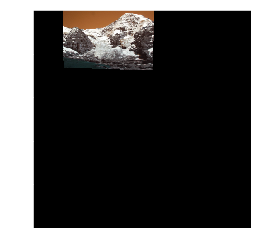

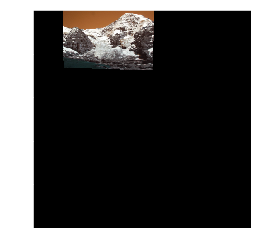

In [40]:
plt.imshow(img1) 
print(HLM)
# plt.imshow(getHomographedImg(img1,HLM).astype('int'),1000,1000)
plt.imshow(getHomographedImg(img2,np.linalg.inv(HMR),1000,1000).astype('int'))



[[1, 0, 183.27860622182368], [0, 1, 3.7218935631888455], [0, 0, 1]]
[[ 1.12966570e+00 -5.46321812e-02 -1.65052137e+02]
 [ 1.09376598e-01  1.08177909e+00 -3.72189356e+00]
 [ 3.56433597e-04 -4.48372703e-05  1.00000000e+00]]
[[ 1.19499236e+00 -6.28498936e-02  1.82264692e+01]
 [ 1.10703206e-01  1.08161221e+00  0.00000000e+00]
 [ 3.56433597e-04 -4.48372703e-05  1.00000000e+00]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(277, 247)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(272, 258)


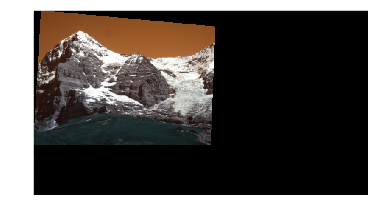

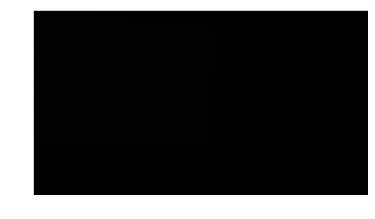

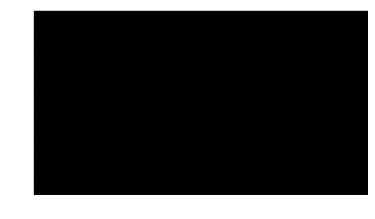

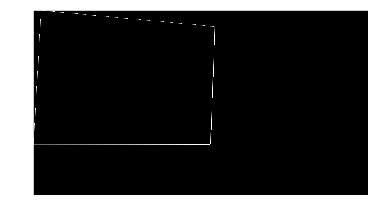

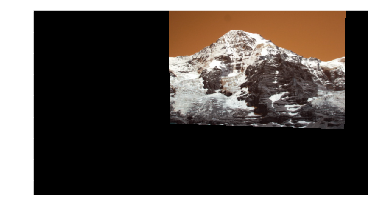

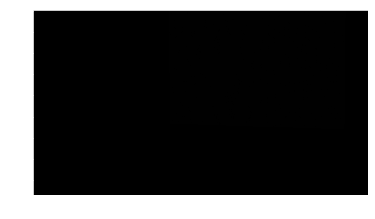

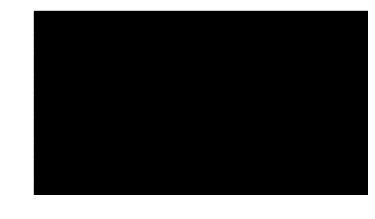

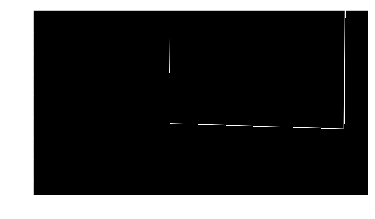

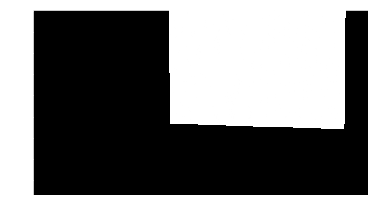

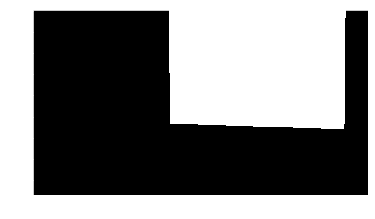

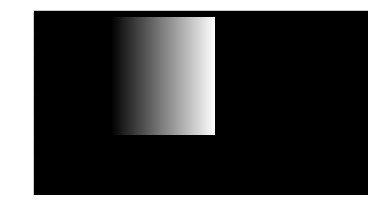

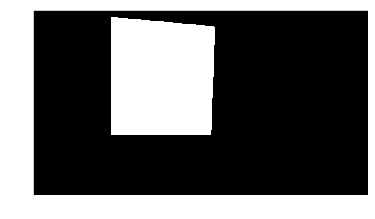

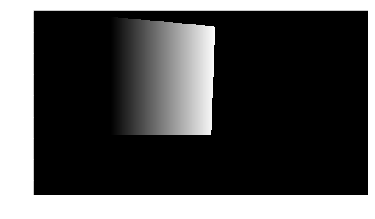

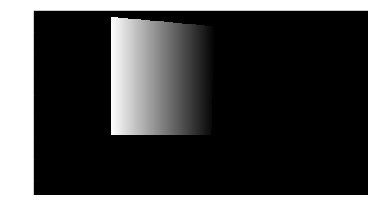

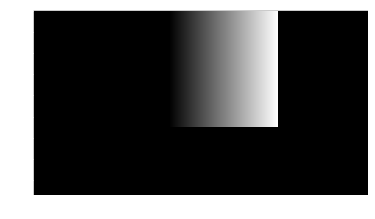

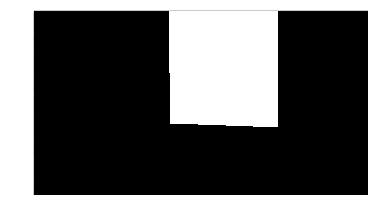

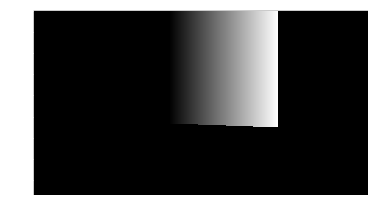

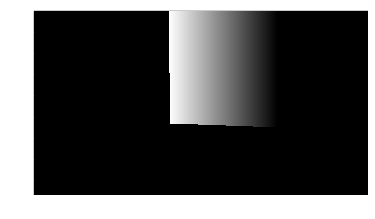

In [43]:
res,res2 = stitch_neo(img1,img2,img3,HLM,HMR)

True

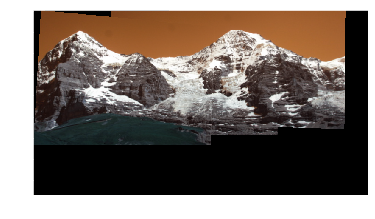

In [44]:
plt.imshow(res.astype('int'))
cv2.imwrite("fuckyeah.png",res)
